In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [38]:
# We are calibrating our capacitive depth sensor by measuring the time it takes to charge the capacitor to a 
# threshold 0f 90%, and then discharge it to the same threshold. To enhance precision, each measurement 
# involves cycling the sensor 100 times, and then taking the mean value
# Data collected in depth increments of 5cm, from 0 - 25cm. The time interval is measured in microseconds (µs)

cycle_time_0cm = np.array([478.02, 485.34, 477.31, 478.03, 471.06, 470.89, 476.61, 472.25, 478.01, 473.75,
                           469.27, 470.15, 475.07, 478.68, 477.57, 478.23, 476.27, 470.19, 473.15, 475.99,
                           470.59, 472.36, 471.45])
cycle_time_5cm = np.array([557.14, 555.03, 562, 556.36, 557.28, 565.44, 567.75, 561.11, 562.38, 564.38, 
                           566, 568.41, 564.82, 559.67, 563.02, 557.85, 568.16, 564.72, 562.9, 562.11,
                           557.15, 557.85, 562.08])
cycle_time_10cm = np.array([605.94, 612.13, 607.53, 611.15, 613.14, 605.68, 604.04, 613.16, 611.56, 607.57,
                            608.74, 612.08, 615.77, 614.97, 593.77, 604.21, 608.87, 606.73, 606.82, 611.54,
                            599.95, 606.28, 612.82])
cycle_time_15cm = np.array([694.04, 688.02, 690.05, 682.15, 685.53, 695.58, 686.06, 683.32, 679.1, 682.98,
                            680.84, 691.85, 684.93, 685.66, 689.01, 698.48, 691.37, 690.12, 684.61, 684.04,
                            686.6, 686.37, 698.96])
cycle_time_20cm = np.array([781.92, 774.53, 777.38, 764.64, 770.43, 775.66, 778.86, 773.7, 781.55, 786.6,
                            785.24, 777.15, 765.14, 772.69, 760.56, 770.83, 765.45, 761.5, 760.49, 758.87,
                            759.28, 757.41, 763.58])
cycle_time_25cm = np.array([852.14, 855.62, 858.79, 884.16, 864.17, 844.39, 845.93, 868.77, 864.1, 855.99,
                            859.1, 851.42, 884.73, 893.26, 873.17, 870.11, 899.48, 883.5, 897.44, 876.82,
                            886.92, 900.49, 882.34])

In [39]:
# Calculate Standard deviation
std_dev_set_0cm = np.std(cycle_time_0cm)
std_dev_set_5cm = np.std(cycle_time_5cm)
std_dev_set_10cm = np.std(cycle_time_10cm)
std_dev_set_15cm = np.std(cycle_time_15cm)
std_dev_set_20cm = np.std(cycle_time_20cm)
std_dev_set_25cm = np.std(cycle_time_25cm)

# Calculate mean for each set
mean_set_0cm = np.mean(cycle_time_0cm)
mean_set_5cm = np.mean(cycle_time_5cm)
mean_set_10cm = np.mean(cycle_time_10cm)
mean_set_15cm = np.mean(cycle_time_15cm)
mean_set_20cm = np.mean(cycle_time_20cm)
mean_set_25cm = np.mean(cycle_time_25cm)

# Display standard deviation with two decimal places, and mean for context
print(f"Set 0cm : Mean = {mean_set_0cm:.2f}, Std Dev = {std_dev_set_0cm:.2f}")
print(f"Set 5cm : Mean = {mean_set_5cm:.2f}, Std Dev = {std_dev_set_5cm:.2f}")
print(f"Set 10cm: Mean = {mean_set_10cm:.2f}, Std Dev = {std_dev_set_10cm:.2f}")
print(f"Set 15cm: Mean = {mean_set_15cm:.2f}, Std Dev = {std_dev_set_15cm:.2f}")
print(f"Set 20cm: Mean = {mean_set_20cm:.2f}, Std Dev = {std_dev_set_20cm:.2f}")
print(f"Set 25cm: Mean = {mean_set_25cm:.2f}, Std Dev = {std_dev_set_25cm:.2f}")



Set 0cm : Mean = 474.79, Std Dev = 3.83
Set 5cm : Mean = 561.90, Std Dev = 3.92
Set 10cm: Mean = 608.45, Std Dev = 4.95
Set 15cm: Mean = 687.81, Std Dev = 5.22
Set 20cm: Mean = 770.59, Std Dev = 8.84
Set 25cm: Mean = 871.86, Std Dev = 17.10


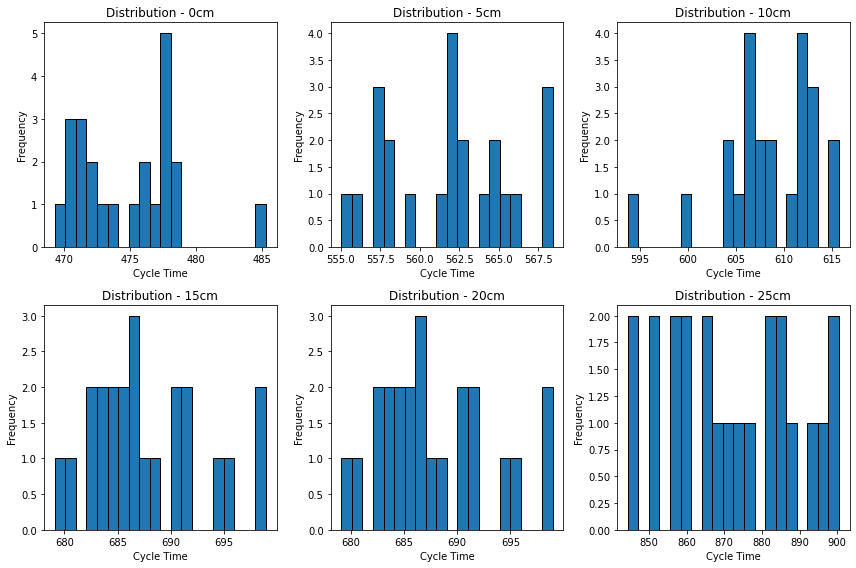

In [46]:
# Visualizing Cycle Time Distributions at Different Fluid Depths

# In this set of histograms, we visualize the distribution of cycle times obtained from our capacitive depth sensor
# at various fluid depths. Each subplot represents a different fluid depth, and the histograms provide insights into
# the frequency distribution of cycle times at each depth. The x-axis represents cycle time, and the y-axis
# represents the frequency of occurrences.

# Create a list of all data collections
all_data_collections = [cycle_time_0cm, cycle_time_5cm, cycle_time_10cm, cycle_time_15cm, cycle_time_15cm, 
                        cycle_time_25cm]

# Manually provide a list of titles
titles = ['Distribution - 0cm', 'Distribution - 5cm', 'Distribution - 10cm', 'Distribution - 15cm', 
          'Distribution - 20cm', 'Distribution - 25cm']

# Plot histograms for all data collections
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

for i, data_collection in enumerate(all_data_collections):
    plt.subplot(2, 3, i + 1)  # Adjust the layout as needed
    plt.hist(data_collection, bins=20, edgecolor='black')
    plt.xlabel('Cycle Time')
    plt.ylabel('Frequency')
    
    # Use the manually provided titles
    plt.title(titles[i])

plt.tight_layout()
plt.show()

In [29]:
fluid_levels = np.array([0, 5, 10, 15, 20, 25])
capacitance_readings = np.array([mean_set_0cm, mean_set_5cm, mean_set_10cm, mean_set_15cm, mean_set_20cm, 
                                 mean_set_25cm])

In [30]:
def linear_equation(x, m, b):
    """
    Computes the linear equation y = mx + b.

    Parameters:
    - x (array-like): Independent variable.
    - m (float): Slope of the line.
    - b (float): Y-intercept of the line.

    Returns:
    float: Dependent variable values based on the linear equation.
    """
    return m * x + b

In [ ]:
fluid_levels = np.array([0, 5, 10, 15, 20, 25])
capacitance_readings = np.array([mean_set_0cm, mean_set_5cm, mean_set_10cm, mean_set_15cm, mean_set_20cm, 
                                 mean_set_25cm])

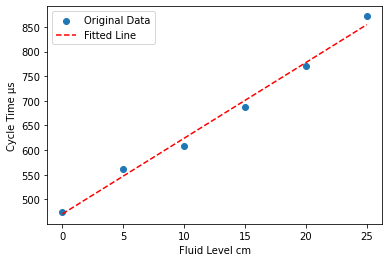

In [35]:
# Scatter plot depicting the relationship between Fluid Depth (cm) and Cycle Time (μs)
# Each data point represents a specific fluid depth, and the red dashed line represents the fitted
# line based on the proposed linear equation. 

plt.scatter(fluid_levels, capacitance_readings, label='Original Data')
plt.plot(fluid_levels, linear_equation(fluid_levels, *params), 'r--', label='Fitted Line')
plt.xlabel('Depth cm')
plt.ylabel('Cycle Time μs')
plt.legend()
plt.show()


In [37]:
print('Optimized Parameters (m, b):', params)
print('Covariance Matrix:')
print(covariance)

Optimized Parameters (m, b): [ 15.37584349 470.3691303 ]
Covariance Matrix:
[[  0.57114766  -7.13934566]
 [ -7.13934566 130.88800325]]


In [ ]:
# Conclusion:

# In this analysis, we calibrated our capacitive depth sensor by measuring cycle times at various fluid depths.
# The proposed linear equation, cycle_time = 15.4(depth) + 470, was fitted to the data, and the resulting
# relationship provides a valuable tool for estimating fluid depth based on cycle time.

# cycle_time = 15.4(depth) + 470
# depth = (cycle_time - 470) / 15.37